In [4]:
# Importing required libraries
# for interacting with the operating system
import os 

# for numerical computations
import numpy as np  

# for data manipulation and analysis
import pandas as pd 

# for data visualization
from matplotlib import pyplot as plt  

%matplotlib inline
# for advanced data visualization
import seaborn as sns 

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")  

# for finding files/pathnames that match a specified pattern
import glob  

# for working with zip files
import zipfile  

# for data preprocessing
from sklearn.preprocessing import StandardScaler  

# for model evaluation
from sklearn.metrics import classification_report, confusion_matrix  # for model evaluation

In [5]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# List the files in the 'EyeT' directory
!ls '/content/drive/MyDrive/CE888/EyeT'

columns_explained.pdf
coordinate_system.pdf
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_10.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_11.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_12.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_13.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_14.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_15.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_16.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_17.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_18.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_19.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_20.

In [7]:

dir_path =  r"//content/drive/MyDrive/CE888/EyeT"



# dataset 1 : EyeT group dataset II

In [8]:
# Create an empty DataFrame to store the data
csv_files_II = glob.glob(os.path.join(dir_path, "EyeT_group_dataset_II_"+"*.csv"))

dataset1 = pd.DataFrame()

# Loop over the list of csv files
for file in csv_files_II:
  # Read the csv file
  temp_df = pd.read_csv(file, header=10, nrows=3) # 3 samples per file; total 502 files; total of 1506 samples
  dataset1 = dataset1.append(temp_df, ignore_index=True)

# Print the first few rows of the new DataFrame
dataset1.head()

,6112,48614378,515022698549,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020.1,30.09.2020.2,...,"-0,22447","-0,90401","142,2","439,2","111,6","33,1","0,0561","0,1120","0,0561.1","0,1120.1"
0,6113.0,48622711.0,5.150227e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6114.0,48631081.0,5.150227e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6115.0,48639377.0,5.150227e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Eye Tracker,Control group experiment,30.09.2020,Participant0002,NaN,30.09.2020,30.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Eye Tracker,Control group experiment,30.09.2020,Participant0002,NaN,30.09.2020,30.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Print the information about the DataFrame
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Columns: 3270 entries, 6112 to 0,1120.1
dtypes: float64(1205), int64(2), object(2063)
memory usage: 10.6+ MB


In [11]:
# Displaying Total Number of Rows and coloumn
print('Number of rows:', dataset1.shape[0])
print('Number of columns:', dataset1.shape[1])

Number of rows: 426
Number of columns: 3270


The more severe the symptoms of depression were, the less dilated the pupils would become. this data can be used to analyze depression based on empathy.

In [12]:
# compute features are used bsed on pupil dilation, eye position, and gazing
dataset1 = dataset1.iloc[:, [33,34,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]] 

In [13]:
# Rename the columns of the DataFrame
dataset1.columns = ['P_dia_left', 'P_dia_right', 'Eyepos1','Eyepos2','Eyepos3','Eyepos4','Eyepos5', 'Gazefeature1','Gazefeature2',
               'Gazefeature3','Gazefeature4','Gazefeature5','Gazefeature6','Gazefeature7','Gazefeature8','Gazefeature9','Gazefeature10',]

In [14]:
# Show the first few rows of the DataFrame
dataset1.head()

,P_dia_left,P_dia_right,Eyepos1,Eyepos2,Eyepos3,Eyepos4,Eyepos5,Gazefeature1,Gazefeature2,Gazefeature3,Gazefeature4,Gazefeature5,Gazefeature6,Gazefeature7,Gazefeature8,Gazefeature9,Gazefeature10
0,"-0,98327",NaN,"196,0","43,2","554,5","261,8","44,4","550,6","329,8","86,5","350,6","94,6","0,6693","0,3064","0,6464","0,2927","0,6922"
1,"-0,98304","3,03","196,2","43,4","553,8","262,0","44,7","550,1","328,8","96,6","354,9","88,5","0,6729","0,3131","0,6443","0,3268","0,7015"
2,"-0,98287",NaN,"196,4","43,5","553,8","262,2","44,7","550,1","328,2","102,3","355,4","89,0","0,6727","0,3235","0,6429","0,3461","0,7026"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Print the statistical summary of the DataFrame
dataset1.describe()

,P_dia_left,P_dia_right,Eyepos1,Eyepos2,Eyepos3,Eyepos4,Eyepos5,Gazefeature1,Gazefeature2,Gazefeature3,Gazefeature4,Gazefeature5,Gazefeature6,Gazefeature7,Gazefeature8,Gazefeature9,Gazefeature10
count,12,77,12,12,12,12,12,12,12,12,12,12,12,12,14,12,12
unique,3,55,3,3,2,3,2,2,3,3,3,3,3,3,5,3,3
top,"-0,98327","3,03","196,0","43,2","553,8","261,8","44,7","550,1","329,8","86,5","350,6","94,6","0,6693","0,3064","0,6464","0,2927","0,6922"
freq,4,4,4,4,8,4,8,8,4,4,4,4,4,4,4,4,4


In [16]:
value = {'P_dia_left': -.9, 'P_dia_right': 2, 'Eyepos1': 190, 'Eyepos2': 45, 'Eyepos3': 600, 'Eyepos4': 230, 'Eyepos5': 40, 
         'Gazefeature1': 740, 'Gazefeature2': 240,'Gazefeature3': 80,'Gazefeature4': 240,'Gazefeature5': 90,'Gazefeature6': .47,
         'Gazefeature7': 0.3,'Gazefeature8': 0.45,'Gazefeature9': 0.28,'Gazefeature10': 0.5}  ## Created value near by the top value from describe function

In [17]:
#fill missing values and data handling


# Replace all commas with periods in the DataFrame
dataset1 = dataset1.replace(',','.',regex=True)

# Fill missing values in the DataFrame with a specified value
dataset1 = dataset1.fillna(value)

# Show the first few rows of the DataFrame
dataset1.head()


,P_dia_left,P_dia_right,Eyepos1,Eyepos2,Eyepos3,Eyepos4,Eyepos5,Gazefeature1,Gazefeature2,Gazefeature3,Gazefeature4,Gazefeature5,Gazefeature6,Gazefeature7,Gazefeature8,Gazefeature9,Gazefeature10
0,-0.98327,2,196.0,43.2,554.5,261.8,44.4,550.6,329.8,86.5,350.6,94.6,0.6693,0.3064,0.6464,0.2927,0.6922
1,-0.98304,3.03,196.2,43.4,553.8,262.0,44.7,550.1,328.8,96.6,354.9,88.5,0.6729,0.3131,0.6443,0.3268,0.7015
2,-0.98287,2,196.4,43.5,553.8,262.2,44.7,550.1,328.2,102.3,355.4,89.0,0.6727,0.3235,0.6429,0.3461,0.7026
3,-0.9,2,190,45,600,230,40,740,240,80,240,90,0.47,0.3,0.45,0.28,0.5
4,-0.9,2,190,45,600,230,40,740,240,80,240,90,0.47,0.3,0.45,0.28,0.5


In [18]:
# Print the information about the DataFrame

dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   P_dia_left     426 non-null    object
 1   P_dia_right    426 non-null    object
 2   Eyepos1        426 non-null    object
 3   Eyepos2        426 non-null    object
 4   Eyepos3        426 non-null    object
 5   Eyepos4        426 non-null    object
 6   Eyepos5        426 non-null    object
 7   Gazefeature1   426 non-null    object
 8   Gazefeature2   426 non-null    object
 9   Gazefeature3   426 non-null    object
 10  Gazefeature4   426 non-null    object
 11  Gazefeature5   426 non-null    object
 12  Gazefeature6   426 non-null    object
 13  Gazefeature7   426 non-null    object
 14  Gazefeature8   426 non-null    object
 15  Gazefeature9   426 non-null    object
 16  Gazefeature10  426 non-null    object
dtypes: object(17)
memory usage: 56.7+ KB


In [20]:
# Displaying Total Number of Rows and coloumn
print('Number of rows:', dataset1.shape[0])
print('Number of columns:', dataset1.shape[1])

Number of rows: 426
Number of columns: 17


total samples = 426

training = 2/3(426) = 284

testing = 426-284 = 142

In [21]:
# Import the KMeans module from the sklearn library
from sklearn.cluster import KMeans

In [22]:
# 1/3 samples used for training
kmeans_1 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(dataset1.iloc[:284])

In [23]:
# printing values
kmeans_1.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [24]:
# Use the KMeans model to predict the clusters for the remaining rows of the DataFrame
y_kmeans_1=kmeans_1.predict(dataset1.iloc[285:426])

In [25]:
#Print the centers of the clusters identified by the KMeans model
kmeans_1.cluster_centers_

array([[-9.00000000e-01,  2.30055147e+00,  1.90000000e+02,
         4.50000000e+01,  6.00000000e+02,  2.30000000e+02,
         4.00000000e+01,  7.40000000e+02,  2.40000000e+02,
         8.00000000e+01,  2.40000000e+02,  9.00000000e+01,
         4.70000000e-01,  3.00000000e-01,  4.51449265e-01,
         2.80000000e-01,  5.00000000e-01],
       [-9.83060000e-01,  2.34333333e+00,  1.96200000e+02,
         4.33666667e+01,  5.54033333e+02,  2.62000000e+02,
         4.46000000e+01,  5.50266667e+02,  3.28933333e+02,
         9.51333333e+01,  3.53633333e+02,  9.07000000e+01,
         6.71633333e-01,  3.14333333e-01,  6.44533333e-01,
         3.21866667e-01,  6.98766667e-01]])

In [28]:
# Import the silhouette_score module from the sklearn.metrics library

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the KMeans model using the first 504 rows of the DataFrame
score = silhouette_score(dataset1.iloc[:284], kmeans_1.labels_, metric='euclidean')
#
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.996


# dataset **2**: eyeT group dataset-III

In [29]:
# Create an empty DataFrame to store the data
csv_files_III = glob.glob(os.path.join(dir_path, "EyeT_group_dataset_III"+"*.csv"))

dataset2 = pd.DataFrame()
  
# loop over the list of csv files
for file in csv_files_III:  
  # read the csv file
  temp_df1 = pd.read_csv(file, header=10, nrows=3) # 3 sample per file; total 502 files; total of 1506 samples
  dataset2 = dataset2.append(temp_df1, ignore_index=True)

# Show the first few rows of the DataFrame
dataset2.head()

,3091,23484445,512157516,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020.1,24.09.2020.2,...,"0,3741","0,4107","0,5453","0,4544",95748,3733793,1835068759518,15:32:21.287,13:32:21.287,63470
0,3092.0,23492835.0,512165906.0,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3093.0,23501167.0,512174238.0,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3094.0,23509455.0,512182526.0,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Eye Tracker,Test group experiment,24.09.2020,Participant0001,NaN,24.09.2020,24.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Eye Tracker,Test group experiment,24.09.2020,Participant0001,NaN,24.09.2020,24.09.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Print the information about the DataFrame
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Columns: 6456 entries, 3091 to 63470
dtypes: float64(2243), int64(2), object(4211)
memory usage: 53.2+ MB


In [33]:
# Displaying Total Number of Rows and coloumn
print('Number of rows:', dataset2.shape[0])
print('Number of columns:', dataset2.shape[1])

Number of rows: 1080
Number of columns: 6456


The more severe the symptoms of depression were, the less dilated the pupils would become. this data can be used to analyze depression based on empathy.

In [34]:
# compute features are used bsed on pupil dilation, eye position, and gazing
dataset2 = dataset2.iloc[:, [33,34,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]] # compute features are used bsed on pupil dilation, eye position, and gazing

In [35]:
# Rename the columns of the DataFrame
dataset2.columns = ['P_dia_left', 'P_dia_right', 'Eyepos1','Eyepos2','Eyepos3','Eyepos4','Eyepos5', 'Gazefeature1','Gazefeature2',
               'Gazefeature3','Gazefeature4','Gazefeature5','Gazefeature6','Gazefeature7','Gazefeature8','Gazefeature9','Gazefeature10',]

In [36]:
# Show the first few rows of the DataFrame
dataset2.head()

,P_dia_left,P_dia_right,Eyepos1,Eyepos2,Eyepos3,Eyepos4,Eyepos5,Gazefeature1,Gazefeature2,Gazefeature3,Gazefeature4,Gazefeature5,Gazefeature6,Gazefeature7,Gazefeature8,Gazefeature9,Gazefeature10
0,"-0,99980","3,13","197,1","76,9","829,1","264,8","75,3","839,8","254,1","117,4","280,3","69,3","0,5100","0,3159","0,4780","0,3974","0,5420"
1,"-0,99977",NaN,"197,2","76,9","829,1","264,8","75,2","840,0","260,6","88,5","281,7","68,9","0,5196","0,2663","0,4939","0,2995","0,5454"
2,"-0,99968",NaN,"197,1","76,9","829,3","264,8","75,2","840,2","258,5","92,6","278,3","91,5","0,5130","0,3115","0,4888","0,3133","0,5371"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Print the statistical summary of the DataFrame
dataset2.describe()

,P_dia_left,P_dia_right,Eyepos1,Eyepos2,Eyepos3,Eyepos4,Eyepos5,Gazefeature1,Gazefeature2,Gazefeature3,Gazefeature4,Gazefeature5,Gazefeature6,Gazefeature7,Gazefeature8,Gazefeature9,Gazefeature10
count,18,218,18,21,18,21,18,18,18,18,21,21,18,20,18,18,18
unique,3,98,2,4,2,4,2,3,3,3,3,4,3,4,3,3,3
top,"-0,99980","3,17","197,1","76,9","829,1","264,8","75,2","839,8","254,1","117,4","280,3","69,3","0,5100","0,3159","0,4780","0,3974","0,5420"
freq,6,9,12,18,12,18,12,6,6,6,9,8,6,6,6,6,6


In [38]:
value = {'P_dia_left': -.9, 'P_dia_right': 2, 'Eyepos1': 190, 'Eyepos2': 45, 'Eyepos3': 600, 'Eyepos4': 230, 'Eyepos5': 40, 
         'Gazefeature1': 740, 'Gazefeature2': 240,'Gazefeature3': 80,'Gazefeature4': 240,'Gazefeature5': 90,'Gazefeature6': .47,
         'Gazefeature7': 0.3,'Gazefeature8': 0.45,'Gazefeature9': 0.28,'Gazefeature10': 0.5}  ## Created value near by the top value from describe function

In [39]:
# Replace all commas with periods in the DataFrame
dataset2 = dataset2.replace(',','.',regex=True)
# Fill missing values in the DataFrame with a specified value
dataset2 = dataset2.fillna(value)
# Show the first few rows of the DataFrame
dataset2.head()

,P_dia_left,P_dia_right,Eyepos1,Eyepos2,Eyepos3,Eyepos4,Eyepos5,Gazefeature1,Gazefeature2,Gazefeature3,Gazefeature4,Gazefeature5,Gazefeature6,Gazefeature7,Gazefeature8,Gazefeature9,Gazefeature10
0,-0.99980,3.13,197.1,76.9,829.1,264.8,75.3,839.8,254.1,117.4,280.3,69.3,0.5100,0.3159,0.4780,0.3974,0.5420
1,-0.99977,2,197.2,76.9,829.1,264.8,75.2,840.0,260.6,88.5,281.7,68.9,0.5196,0.2663,0.4939,0.2995,0.5454
2,-0.99968,2,197.1,76.9,829.3,264.8,75.2,840.2,258.5,92.6,278.3,91.5,0.5130,0.3115,0.4888,0.3133,0.5371
3,-0.9,2,190,45,600,230,40,740,240,80,240,90,0.47,0.3,0.45,0.28,0.5
4,-0.9,2,190,45,600,230,40,740,240,80,240,90,0.47,0.3,0.45,0.28,0.5


In [40]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   P_dia_left     1080 non-null   object
 1   P_dia_right    1080 non-null   object
 2   Eyepos1        1080 non-null   object
 3   Eyepos2        1080 non-null   object
 4   Eyepos3        1080 non-null   object
 5   Eyepos4        1080 non-null   object
 6   Eyepos5        1080 non-null   object
 7   Gazefeature1   1080 non-null   object
 8   Gazefeature2   1080 non-null   object
 9   Gazefeature3   1080 non-null   object
 10  Gazefeature4   1080 non-null   object
 11  Gazefeature5   1080 non-null   object
 12  Gazefeature6   1080 non-null   object
 13  Gazefeature7   1080 non-null   object
 14  Gazefeature8   1080 non-null   object
 15  Gazefeature9   1080 non-null   object
 16  Gazefeature10  1080 non-null   object
dtypes: object(17)
memory usage: 143.6+ KB


total samples = 1080

training = 284 (same as dataset 1);testing = 796;

In [41]:
# 1/2 samples used for training; total=1080, 
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(dataset2.iloc[:284])

In [42]:
# printing values
kmeans_2.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [43]:
# Use the KMeans model to predict the clusters for the remaining rows of the DataFrame
y_kmeans_2=kmeans_2.predict(dataset2.iloc[285:1080])

In [44]:
#Print the centers of the clusters identified by the KMeans model
kmeans_2.cluster_centers_

array([[-9.00000000e-01,  2.29089219e+00,  1.90000000e+02,
         4.50000000e+01,  6.00000000e+02,  2.30000000e+02,
         4.00000000e+01,  7.40000000e+02,  2.40000000e+02,
         8.00000000e+01,  2.40000000e+02,  9.00000000e+01,
         4.70000000e-01,  3.00000000e-01,  4.50000000e-01,
         2.80000000e-01,  5.00000000e-01],
       [-9.99750000e-01,  2.37666667e+00,  1.97133333e+02,
         7.69000000e+01,  8.29166667e+02,  2.64800000e+02,
         7.52333333e+01,  8.40000000e+02,  2.57733333e+02,
         9.95000000e+01,  2.80100000e+02,  7.65666667e+01,
         5.14200000e-01,  2.97900000e-01,  4.86900000e-01,
         3.36733333e-01,  5.41500000e-01]])

In [45]:
# Import the silhouette_score module from the sklearn.metrics library
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the KMeans model using the first 504 rows of the DataFrame
score1 = silhouette_score(dataset2.iloc[:284], kmeans_2.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score1)

Silhouetter Score: 0.994


# Comparison

In [46]:
print('Empathy Score on dataset 1: %.3f' % score, '\n Empathy Score on dataset 2: %.3f' % score1)

Empathy Score on dataset 1: 0.996 
 Empathy Score on dataset 2: 0.994


# Visuals

In [40]:
dir_path =  r"//content/drive/MyDrive/CE888/EyeT/"

In [41]:
# Create an empty list to store the data
import os
import pandas as pd
csv_all_files = os.listdir(dir_path)
list_df = []
# loop over the list of csv files
for file in csv_all_files:  
  if file.endswith(".csv"):
    # read the csv file
    file_path = os.path.join(dir_path, file)
    df = pd.read_csv(file_path)
    list_df.append(df)
df = pd.concat(list_df)

In [42]:
# correlation matrix
corr_mat = df.corr()
# print(corr_mat)

In [43]:
corr_mat

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y
Unnamed: 0,1.000000,0.092717,-0.313829,0.107249,NaN,NaN,-0.029280,0.055602,0.185465,0.091527,...,0.027840,0.038420,0.173897,0.149906,-0.019835,0.074307,0.044784,0.226566,0.476516,-0.098092
Recording timestamp,0.092717,1.000000,-0.025523,0.597794,NaN,NaN,0.021694,-0.000678,0.045155,0.007403,...,-0.124763,-0.081055,0.255277,0.228280,0.006437,0.483362,-0.000954,0.019653,0.308740,-0.078450
Computer timestamp,-0.313829,-0.025523,1.000000,-0.024571,NaN,NaN,0.095105,-0.053950,-0.073442,-0.084919,...,0.034837,0.020632,0.128994,0.120211,0.054854,-0.105981,-0.052497,-0.059072,-0.257433,0.094268
Recording duration,0.107249,0.597794,-0.024571,1.000000,NaN,NaN,0.038482,-0.074680,0.012094,-0.062716,...,-0.135955,-0.074948,0.390106,0.345680,0.009662,0.267594,-0.069043,-0.009691,0.268714,-0.129933
Recording resolution height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recording resolution width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eyetracker timestamp,-0.029280,0.021694,0.095105,0.038482,NaN,NaN,1.000000,-0.024407,-0.059922,-0.022072,...,0.027272,0.020551,0.079526,0.072938,-0.011469,-0.037295,-0.034199,-0.077118,NaN,NaN
Gaze point X,0.055602,-0.000678,-0.053950,-0.074680,NaN,NaN,-0.024407,1.000000,-0.099854,0.978604,...,0.001498,0.010555,-0.089016,-0.084075,-0.024743,-0.003980,0.994219,-0.113334,NaN,NaN
Gaze point Y,0.185465,0.045155,-0.073442,0.012094,NaN,NaN,-0.059922,-0.099854,1.000000,-0.114397,...,0.024367,0.013702,0.053558,0.046440,-0.025934,0.062328,-0.114461,0.998740,NaN,NaN
Gaze point left X,0.091527,0.007403,-0.084919,-0.062716,NaN,NaN,-0.022072,0.978604,-0.114397,1.000000,...,-0.000173,0.016668,-0.058079,-0.059331,-0.022364,-0.010102,0.978815,-0.111221,NaN,NaN


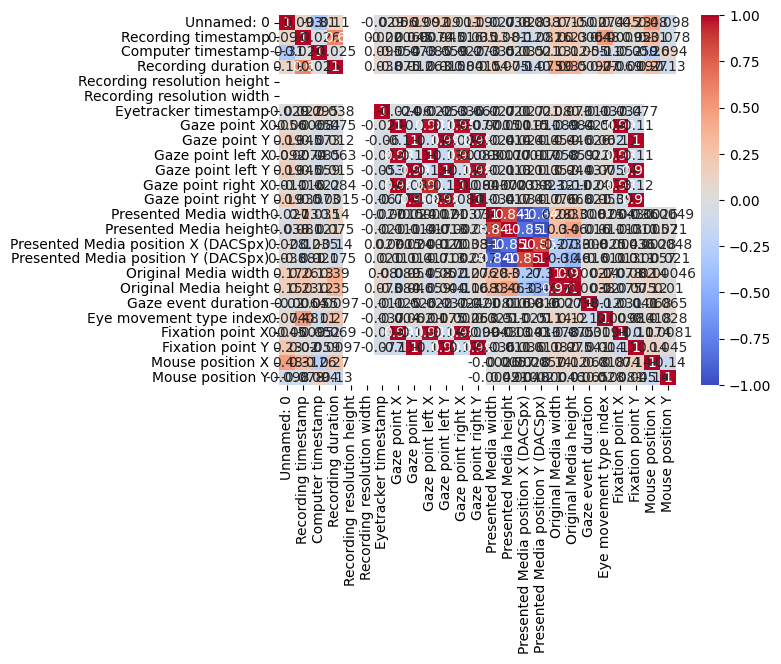

In [44]:
# Create a heatmap using seaborn for Co Relation Matrix
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)
# Show the plot
plt.show()